# Data exploration and visualization

We look at the cleaned listings data, but before it has had its values scaled for the model. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_marina.csv')

In [3]:
df.head()

,identifier,type,size,beds,baths,price,location
0,0,Apartment,1304,2,3,1100000.0,princess tower
1,1,Apartment,1900,3,4,3188888.0,marina tower
2,2,Apartment,1200,1,2,1440000.0,trident grand residence
3,3,Apartment,1200,1,2,1440000.0,trident grand residence
4,4,Apartment,2944,3,5,2900000.0,the atlantic


In [4]:
df.describe()

,identifier,size,beds,baths,price
count,3040.000000,3040.000000,3040.000000,3040.000000,3.040000e+03
mean,1536.278618,1649.444737,1.962500,2.724671,2.162916e+06
std,887.932556,1297.900363,1.062652,1.203066,2.432664e+06
min,0.000000,96.000000,0.000000,1.000000,3.550000e+05
25%,765.750000,860.000000,1.000000,2.000000,1.000000e+06
50%,1536.500000,1302.000000,2.000000,2.000000,1.500000e+06
75%,2304.250000,1814.000000,3.000000,3.000000,2.300000e+06
max,3074.000000,15320.000000,7.000000,7.000000,4.900000e+07


One of the goals of the project is to present a summary table to users - so let's think about what would be useful to see.

In [7]:
# high level overview of the dataset
stats_df = df[['size','beds', 'price']] \
                  .agg(['min', 'max', 'median', 'std']).T # replaced mean with median
stats_df

,min,max,median,std
size,96.0,15320.0,1302.0,1.297900e+03
beds,0.0,7.0,2.0,1.062652e+00
price,355000.0,49000000.0,1500000.0,2.432664e+06


In [8]:
# we would like to see it agreggated by the number of bedrooms
stats_by_beds_df = df.groupby('beds')[['price', 'size']] \
                          .agg(['min', 'max', 'median'])
stats_by_beds_df

price                         size               
            min         max     median   min    max  median
beds                                                       
0      355000.0   1750000.0   679000.0   337    865   496.0
1      459950.0   2310000.0  1000050.0    96   2112   827.0
2      600000.0  14050000.0  1650000.0   595   3442  1350.0
3      900000.0   9995000.0  2700000.0   160   6141  2150.0
4     1600000.0  23500000.0  5900000.0  2120   9604  4391.5
5     4799999.0  49000000.0  6450000.0  3277  15320  6146.0
7     7950000.0   7950000.0  7950000.0  8427   8427  8427.0

In [9]:
# we would like to see it agreggated by the number of bedrooms
stats_by_beds_df = df.groupby('beds')[['price', 'size']] \
                          .agg(['min', 'max', 'mean'])
stats_by_beds_df

price                            size                    
            min         max          mean   min    max         mean
beds                                                               
0      355000.0   1750000.0  7.609796e+05   337    865   502.255814
1      459950.0   2310000.0  1.074770e+06    96   2112   836.485936
2      600000.0  14050000.0  1.703251e+06   595   3442  1408.831516
3      900000.0   9995000.0  2.911604e+06   160   6141  2383.189853
4     1600000.0  23500000.0  6.893962e+06  2120   9604  4306.513514
5     4799999.0  49000000.0  9.060857e+06  3277  15320  6518.200000
7     7950000.0   7950000.0  7.950000e+06  8427   8427  8427.000000

We can choose to display the mean, or de median, and can see both options above. It looks like data skews to the right so presenting the median will be a better option.

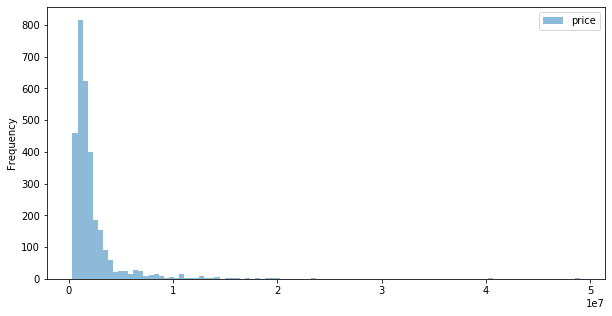

In [15]:
df[['price']].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

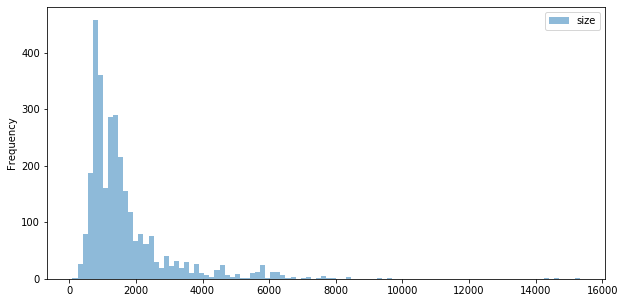

In [16]:
df[['size']].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

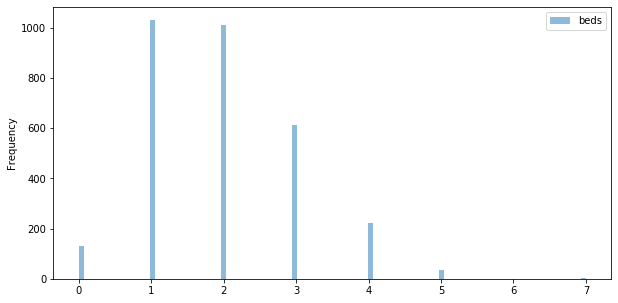

In [17]:
df[['beds']].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

Is there enough listings to make meaningful recomendations by number of bedrooms? We can see below that for most categories, there is. The exception being 6-7 bedroom apartments.

In [22]:
bed_counts = df.groupby('beds')['identifier'].agg(['count'])
bed_counts

,count
beds,
0,129
1,1031
2,1009
3,611
4,222
5,35
7,3


Although this community is dominated by apartments, we can see there are some other apartment types. Is there a meaningful proportion of these?

In [23]:
type_counts = df.groupby('type')['identifier'].agg(['count'])
type_counts

,count
type,
Apartment,2804
Duplex,19
Penthouse,145
Townhouse,72


Are all buildings meaninfully represented in the data, or is there some buildings that have a lot more data? Let's look at the number of unique buildings and how many listings we have for each.

In [25]:
print(f'number of unique buildings in Marina: {df.location.nunique()}')

number of unique buildings in Marina: 93


In [31]:
# grouping by building and counting the number of listings in each
listings_per_building = df.groupby('location')['identifier'].agg(['count']).\
                        sort_values(by=['count'], ascending=False)
listings_per_building.T

location,marina gate,marina promenade,park island,cayan tower,emaar 6 towers,studio one,silverene,damac heights,elite residence,princess tower,...,orra harbour residences and hotel apartments,zumurud tower,the address jumeirah resort and spa,wyndham marina dubai,dream tower,bayside residence,marina diamond 5,panoramic tower,al mass villas,al fardan tower
count,348,139,107,101,98,88,88,86,74,73,...,4,4,3,3,2,2,2,2,1,1


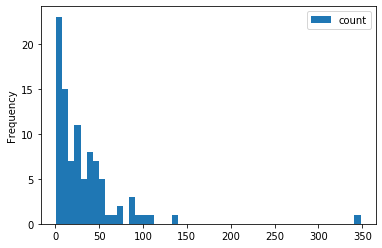

In [33]:
listings_per_building.plot.hist(bins=50)

In [35]:
listings_per_building.describe().T

,count,mean,std,min,25%,50%,75%,max
count,93.0,32.688172,43.186647,1.0,8.0,22.0,44.0,348.0


In [41]:
# proportion of listings in each tower
(listings_per_building.sort_values(by=['count'], ascending=False)/df.shape[0]).T

location,marina gate,marina promenade,park island,cayan tower,emaar 6 towers,studio one,silverene,damac heights,elite residence,princess tower,...,the belvedere,trident oceanic,the address jumeirah resort and spa,wyndham marina dubai,dream tower,bayside residence,marina diamond 5,panoramic tower,al mass villas,al fardan tower
count,0.114474,0.045724,0.035197,0.033224,0.032237,0.028947,0.028947,0.028289,0.024342,0.024013,...,0.001316,0.001316,0.000987,0.000987,0.000658,0.000658,0.000658,0.000658,0.000329,0.000329


We can see above that some buildings are disproportionally represented in the data, such as Marina Gate. Imagine being a user trying to parse through options in a listing website and 20% of the listings displayed are for apartments in 4 buildings only. It would be hard to discover new locations which are drowned in all of this noise.

Let's look at the distribution of bedrooms by building.

In [47]:
beds_by_location = df.groupby(['location', 'beds'])['identifier'].agg(['count'])\
                            .sort_values(by=['count'], ascending=False)
beds_by_location

count
location                beds       
marina gate             1       146
                        2        83
marina promenade        1        70
marina gate             4        55
park island             1        54
...                             ...
marina arcade tower     4         1
marina 101              1         1
manchester tower        2         1
trident grand residence 4         1
zumurud tower           3         1

[283 rows x 1 columns]

One thing to notice is that Marina Gate has 55 listings of 4br apartments. We know there isn't that many 4br units in the building, which leads us to believe there are many companies advertising the same apartments online. This is something you would not see in the US but it is unfortunately a common practice in Dubai. This confuses users and gives a false sense of there being excess supply. Unfortunately it is quite hard to detect how many real listings exists since real estate brokerages do not advertise the actual apartment number, so there is no way to uniquely identify a listing as unique. There are also many instances of false advertisement left online by companies to generate leads. This behaviour is common and makes searching for a house more difficult than it should be. A nearest neighbor search could help cluster the most similar listings by location as an effort to detect instances where multiple listings refer in fact to the same property. This is an extension I will leave for future work, and it is one of the reasons I have chosen to deliver recommendations in a way that picks a single listing per location, to ensure we are not recommending the same apartment twice per batch of recommendations.  

Let's look at 4br listings in Marina Gate in more detail.

In [58]:
mg_4br = df.query("location == 'marina gate' and beds == 4").sort_values(by=['size', 'price'])

In [59]:
mg_4br

,identifier,type,size,beds,baths,price,location
1163,1177,Apartment,2200,4,4,12216050.0,marina gate
2145,2168,Apartment,2351,4,4,3600000.0,marina gate
655,661,Apartment,2352,4,4,3990000.0,marina gate
384,388,Apartment,2352,4,5,4000000.0,marina gate
654,660,Apartment,2352,4,5,4100000.0,marina gate
2266,2291,Apartment,2352,4,4,4400000.0,marina gate
1038,1048,Apartment,2353,4,5,3800000.0,marina gate
335,339,Apartment,2368,4,4,4000000.0,marina gate
1824,1844,Penthouse,3307,4,5,6250000.0,marina gate
2476,2504,Penthouse,3307,4,5,6251000.0,marina gate


It's not hard to see that several listings look like copies of each other, in that the size and price match exactly.  In the full dataset, which I have not included here, you would be able to obvserve that these are not duplicate rows in the data, but unique listings posted by different brokerages but referring to the same physical property. There is no easy way to fix this issue, because in some buildings, there might be in fact multiple physical properties with matching sizes and prices. I have just picked the obvious case of the 4br penthouses in this building because I know for a fact there is just one layout with a particular size, and the rest are duplicates. This is to illustrate the point.

Let's attempt to run a clustering algorithm on this data.

In [60]:
from sklearn.cluster import KMeans

In [61]:
mg_4br.head(1)

,identifier,type,size,beds,baths,price,location
1163,1177,Apartment,2200,4,4,12216050.0,marina gate


We'll remove categorigal columns and cluster by size and price. I will ignore baths since brokerages tend to make mistakes with this value (I know this from experience).

In [64]:
mg_4br_trim = mg_4br.drop(['identifier', 'type', 'baths', 'location'], axis=1)
mg_4br_trim.head(2)

,size,beds,price
1163,2200,4,12216050.0
2145,2351,4,3600000.0


In [82]:
# run clustering
kmeans = KMeans(n_clusters=37, random_state=0).fit(mg_4br_trim)
# append cluster to each row
mg_4br_trim['cluster'] = kmeans.labels_
# show results
mg_4br_trim.groupby('cluster').apply(display)

,size,beds,price,cluster
239,5845,4,12859000.0,0
2193,5845,4,12859000.0,0


,size,beds,price,cluster
2666,3945,4,6650000.0,1


,size,beds,price,cluster
113,4618,4,10649000.0,2


,size,beds,price,cluster
654,2352,4,4100000.0,3


,size,beds,price,cluster
89,6358,4,15250000.0,4
613,6358,4,15250000.0,4


,size,beds,price,cluster
1597,4642,4,11900000.0,5


,size,beds,price,cluster
2536,4313,4,9000000.0,6


,size,beds,price,cluster
1509,3951,4,7100000.0,7


,size,beds,price,cluster
111,6358,4,15699000.0,8


,size,beds,price,cluster
2476,3307,4,6251000.0,9


,size,beds,price,cluster
2145,2351,4,3600000.0,10


,size,beds,price,cluster
1326,5810,4,12950000.0,11
1510,5810,4,12950000.0,11
1674,5810,4,12950000.0,11
2438,5810,4,12950000.0,11
2547,5810,4,12950000.0,11


,size,beds,price,cluster
2069,5776,4,13152000.0,12


,size,beds,price,cluster
2266,2352,4,4400000.0,13


,size,beds,price,cluster
3034,4683,4,11500000.0,14


,size,beds,price,cluster
1163,2200,4,12216050.0,15


,size,beds,price,cluster
1038,2353,4,3800000.0,16


,size,beds,price,cluster
335,2368,4,4000000.0,17


,size,beds,price,cluster
2527,4683,4,10500000.0,18


,size,beds,price,cluster
164,3307,4,6580000.0,19


,size,beds,price,cluster
109,4390,4,10554999.0,20


,size,beds,price,cluster
114,5845,4,13000000.0,21


,size,beds,price,cluster
655,2352,4,3990000.0,22


,size,beds,price,cluster
237,4618,4,10650000.0,23
493,4618,4,10650000.0,23
539,4618,4,10650000.0,23
541,4618,4,10650000.0,23
543,4618,4,10650000.0,23
605,4618,4,10650000.0,23
1171,4618,4,10650000.0,23
1487,4618,4,10650000.0,23
2942,4618,4,10650000.0,23


,size,beds,price,cluster
1375,3307,4,6650000.0,24
1484,3307,4,6650000.0,24
2351,3307,4,6650000.0,24
2949,3307,4,6650000.0,24


,size,beds,price,cluster
1169,6408,4,15700000.0,25


,size,beds,price,cluster
112,6358,4,15249000.0,26


,size,beds,price,cluster
1824,3307,4,6250000.0,27


,size,beds,price,cluster
854,5811,4,12949000.0,28


,size,beds,price,cluster
2066,4393,4,7100000.0,29


,size,beds,price,cluster
97,5845,4,13152000.0,30
1473,5845,4,13152000.0,30


,size,beds,price,cluster
2487,4683,4,11900000.0,31


,size,beds,price,cluster
209,5845,4,12950000.0,32


,size,beds,price,cluster
408,6372,4,15250000.0,33


,size,beds,price,cluster
914,3948,4,7100000.0,34


,size,beds,price,cluster
384,2352,4,4000000.0,35


,size,beds,price,cluster
2404,3316,4,6650000.0,36


""


An input to kmeans is the number of clusters. The goal is to find the maximum number of clusters that separate the data into unique physical properties. This is something I have done by trial and error and will have to learn to do a better job of automating this process. That is the reason I have not partitioned the data in this manner in the final version of the project. Another difficulty arises from the fact that even though two brokerages might be advertising the same property, one might list it at a slight discount (without the landlord's consent) to rank higher in the listing portals. This increases the difficulty of automating this clustering method, but is something we can spot manually with a trained eye. For instance, cluster 26 and 33 (see below) are most likely referring to the same property, but we can see one agency has discounted the listing by 1,000 to beat the other agency in the portal ranking. Also, one of them has the size wrong (6372 vs 6358). These should have been clustered together. Again, I know this because I know the building, but it would otherwise be difficult to spot. As you can see, the market is not as regulated as it is in countries like the US.

e.g.   
6372	4	15250000.0	33   
6358	4	15249000.0	26

As a result of this exploration, I have decided to not include clustering in an attempt to remove duplicate listings, because it might fail in less obvious cases and in other buildings, resulting in dropping listings that are not in fact duplicates but merely similar in size and price. This is especially common for smaller apartments, such as studios, 1br and 2br units.

The recommendation model will simply perform a nearest neighbor search, but serve only one option per building, in an effort to mitigate doubly recommending the same property.